### Import modules

In this problem we need `matplotlib` and `numpy`:

In [33]:
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Storing the student number

My student number is 9831034. We need this number in next parts.

In [34]:
std_num = 9831034

### Part 2: Circle function

We need a function to create an array containing a circle with radius r.

- Values inside the circle are 255 and 0 otherwise.
- Data type of the array must be `numpy.uint8`.

we can use `numpy.fromfunction()` function to generate our circle inside an array:

In [35]:
def generate_circle(r: int) -> np.ndarray:
    '''Creates a circle with radius r.
    :param r int: radius of the circle
    :return: a matrix containing the circle
    '''
    shape = (2 * r + 1, 2 * r + 1)
    matrix = np.fromfunction(lambda i, j : 255 * ((i - r) ** 2 + (j - r) ** 2 <= r ** 2), shape=shape).astype(np.uint8)
    return matrix

To test our function:

In [36]:
r = 5
circle = generate_circle(r)
print('Main circle:')
print(circle)

Main circle:
[[  0   0   0   0   0 255   0   0   0   0   0]
 [  0   0 255 255 255 255 255 255 255   0   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [255 255 255 255 255 255 255 255 255 255 255]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0 255 255 255 255 255 255 255 255 255   0]
 [  0   0 255 255 255 255 255 255 255   0   0]
 [  0   0   0   0   0 255   0   0   0   0   0]]


### Part 3: Noise function

We need another function to add noise to our circle. The function must have the following properties:

- The generated noise must be float numbers with uniform distribution.
- The function must take an argument as the noise domain. So, the noise must be in range of [0, domain].
- The function must add the noise to 0 values and subtract it from 255 values.
- The new values must be floored and the new data type must be equal to the main matrix.

Here is how we can implement our function:

In [37]:
def noise(matrix: np.ndarray, domain: int) -> np.ndarray:
    '''Adds noise to an matrix. if the value in matrix is 255 the noise in negative and if the value is 0 the noise is positive. \n
    :param matrix np.array: a numpy array
    :param domain int: maximum noise range
    :return np.array: a new numpy array containing noisy image
    '''
    # create noise matrix
    noise_matrix = np.random.uniform(low = 0, high = domain, size = matrix.shape)
    # multiply noise values by -1 where the matrix value is 255
    noise_matrix[matrix == 255] *= -1
    # add the noise to our matrix and use floor function
    return np.floor(matrix + noise_matrix).astype(matrix.dtype)

As it is mentioned in the problem, we should initialize `domain` parameter as following:

$domain = 40 + SumDigits(StdNum) \mod 12$

so we need a function to calculate the sum of the digits:

In [38]:
def sum_digits(n: int) -> int:
    '''A function to count the number of digits in a number.
    :param n int: the number
    :return int: number of digits
    '''
    sum_ = 0
    while n > 0:
        sum_ += n % 10
        n //= 10
    return sum_

Now, we can test our function:

In [39]:
domain = 40 + (sum_digits(std_num) % 12)

new_circle = noise(circle, domain)
print('Noisy circle:')
print(new_circle)

Noisy circle:
[[ 31  15  33  19   8 236  24   5  41  34  28]
 [  0  34 221 223 252 247 211 237 230  31   7]
 [ 21 223 211 251 222 219 234 228 228 246  28]
 [ 15 250 213 249 220 216 237 250 235 222  37]
 [ 22 251 222 245 236 239 222 216 231 247   4]
 [222 235 239 223 249 246 236 227 247 240 247]
 [ 38 225 217 251 236 221 213 239 228 235  17]
 [ 39 221 223 223 212 235 223 250 241 217  23]
 [ 18 248 218 234 216 217 248 254 234 216   7]
 [ 37  33 232 251 215 222 247 217 212  43  25]
 [ 33  35  18  21   6 247  43  15  11  13  30]]


### Part 4: Visualizing the circles

Finally, we can visualize our circles. We must take care about the following notes:
- We must use `gray` color map to visualize the circles.
- The noisy circle max value may not be 255 so we must use `vmin` and `vmax` parameters.

We use `matplotlib.imshow()` function to visualize our circles:

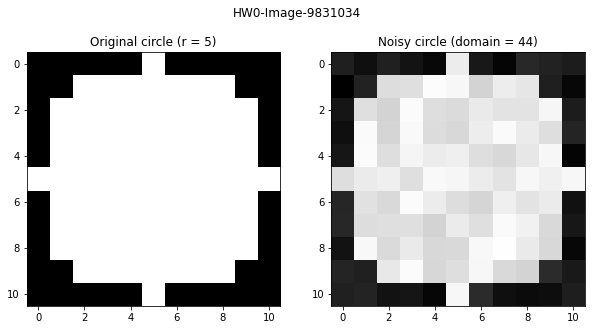

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle(f'HW0-Image-{std_num}')

ax[0].set_title(f'Original circle (r = {r})')
ax[0].imshow(circle, cmap='gray')

ax[1].set_title(f'Noisy circle (domain = {domain})')
ax[1].imshow(new_circle, cmap='gray', vmin = 0, vmax = 255)

plt.show()